# Web Data Scraping

__Web Data Scraping__ is a technique used to extract data from websites. This process involves programmatically accessing web pages and pulling out the information that you need. Web scraping can be used to gather data from websites that do not provide an __*Application Program Interface (API)*__ for easy data access or when you need large amounts of data quickly and the site's API limits do not allow for this. Here are the key aspects of web scraping:

1. __Sending a Request:__ The first step is to send a request to the web server hosting the website from which data is to be scraped. This request is typically done using HTTP or HTTPS protocols.

2. __Receiving the Response:__ The server responds to the request by sending back the requested web page, often in HTML format. Other formats like JSON and XML can also be received depending on the API or web service.

3. __Parsing the Data:__ Once the data is received, it needs to be parsed. For HTML, this usually involves using libraries like BeautifulSoup in Python, which allow for easy navigation of the structure of the HTML and extraction of the relevant information.

4. __Data Extraction:__ After parsing, the necessary data is extracted. This could be anything from product details on an ecommerce site, stock prices, sports statistics, or any other information available on the web.

# Imports

In [ ]:
import pandas as pd
import numpy as np
import requests
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

warnings.filterwarnings("ignore")

## BeautifulSoup Methods (Common)


| Method                  | Description                                      |
|-------------------------|--------------------------------------------------|
| `.find()`               | Finds the **first** matching element             |
| `.find_all()`          | Finds **all** matching elements                  |
| `.find_next()`         | Finds the **next** matching element              |
| `.find_previous()`     | Finds the **previous** matching element          |
| `.find_next_sibling()` | Finds the **next** sibling element               |
| `.find_previous_sibling()` | Finds the **previous** sibling element       |
| `.find_parents()`      | Finds **all** parent elements                    |
| `.find_parent()`       | Finds the **direct** parent element              |
| `.get_text()`          | Extracts text inside a tag                       |
| `.decompose()`         | Removes an element from the HTML                 |
| `.replace_with()`      | Replaces an element with new content             |
| `.select()`           | Finds **multiple** elements using CSS selectors  |
| `.select_one()`       | Finds the **first** element using CSS selectors  |
| `.get()`             | Retrieves an **attribute value**                   |
| `.has_attr()`         | Checks if an element has an **attribute**         |

## Web Scrape Worldometer

In [ ]:
# URL

url = 'https://www.worldometers.info/world-population/world-population-by-year/' # Worldometer

# Send requests

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36'}

# Response

response = requests.get(url = url, headers = headers)

# Create a bs4 object to parse the HTML content

soup = BeautifulSoup(response.content, 'html.parser')

In [ ]:
## Find the table containing the data

table_rows = soup.select('tbody > tr')

In [ ]:
# Define column names

data = []
column_names = ['Year', 'Population', 'Yearly Change', 'Net Change', 'Density (P/km sq)']

for row in table_rows:

  cols = [col.get_text().replace(',', '').replace('%', '').strip() for col in row.find_all('td')]
  data.append(cols)

In [ ]:
# Convert to DataFrame

df = pd.DataFrame(data, columns = column_names)
df = df.iloc[:79,:]
df

,Year,Population,Yearly Change,Net Change,Density (P/km sq)
0,2024,8161972572,0.87,70237642,55
1,2023,8091734930,0.88,70327738,54
2,2022,8021407192,0.84,66958801,54
3,2021,7954448391,0.86,67447099,53
4,2020,7887001292,0.97,75707594,53
...,...,...,...,...,...
74,1900,1600000000,,,
75,1850,1200000000,,,
76,1804,1000000000,,,
77,1760,770000000,,,


In [ ]:
# Fill blanks

# Replace cells that are empty or just whitespace with NaN
df = df.replace(r'^\s*$', 0, regex = True)
df.tail(25)

,Year,Population,Yearly Change,Net Change,Density (P/km sq)
54,1970,3694683794,2.08,75192215,25
55,1969,3619491579,2.10,74304328,24
56,1968,3545187251,2.07,71774371,24
57,1967,3473412880,2.04,69371755,23
58,1966,3404041125,2.08,69507422,23
59,1965,3334533703,2.15,70046364,22
60,1964,3264487339,2.25,71679511,22
61,1963,3192807828,2.22,69433513,21
62,1962,3123374315,1.91,58504640,21
63,1961,3064869675,1.64,49398781,21


In [ ]:
# Data Cleaning (Numerical Values)

# Convert Numerical Values to float data type

df_float = df.loc[:,'Population':].astype(float)
df_float.tail()

,Population,Yearly Change,Net Change,Density (P/km sq)
74,1.600000e+09,0.0,0.0,0.0
75,1.200000e+09,0.0,0.0,0.0
76,1.000000e+09,0.0,0.0,0.0
77,7.700000e+08,0.0,0.0,0.0
78,6.100000e+08,0.0,0.0,0.0


In [ ]:
# Data Cleaning (Dates)

# Convert Numerical Values to float data type

df_date = pd.to_datetime(df['Year']).astype('datetime64[ns]')

In [ ]:
# Concatenate

df = pd.concat([df_date, df_float], axis = 1)
df = df.sort_values('Year', ascending = True)
df

,Year,Population,Yearly Change,Net Change,Density (P/km sq)
78,1700-01-01,6.100000e+08,0.00,0.0,0.0
77,1760-01-01,7.700000e+08,0.00,0.0,0.0
76,1804-01-01,1.000000e+09,0.00,0.0,0.0
75,1850-01-01,1.200000e+09,0.00,0.0,0.0
74,1900-01-01,1.600000e+09,0.00,0.0,0.0
...,...,...,...,...,...
4,2020-01-01,7.887001e+09,0.97,75707594.0,53.0
3,2021-01-01,7.954448e+09,0.86,67447099.0,53.0
2,2022-01-01,8.021407e+09,0.84,66958801.0,54.0
1,2023-01-01,8.091735e+09,0.88,70327738.0,54.0


In [ ]:
# Set Date to Index

df = df.set_index('Year')
df.tail()

,Population,Yearly Change,Net Change,Density (P/km sq)
Year,,,,
2020-01-01,7.887001e+09,0.97,75707594.0,53.0
2021-01-01,7.954448e+09,0.86,67447099.0,53.0
2022-01-01,8.021407e+09,0.84,66958801.0,54.0
2023-01-01,8.091735e+09,0.88,70327738.0,54.0
2024-01-01,8.161973e+09,0.87,70237642.0,55.0


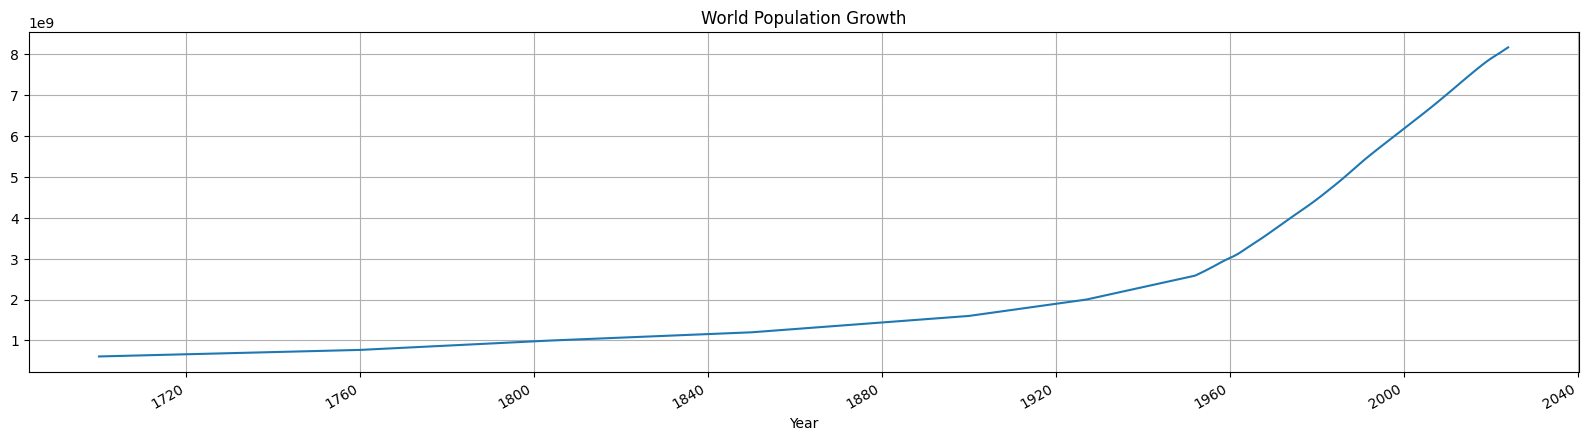

In [ ]:
df['Population'].plot(figsize = (20,5))

plt.title('World Population Growth')
plt.grid()
plt.show()